In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import ssl

In [ ]:
def check_variable_int_float(variable):
    # функция - которая проверяет - является ли переменная целым или числом
    # с плавающей точкой(дробным числом)и предоставляет пользователю возможность
    # вводить значение переменной до тех пор - пока не будет введен верный тип
    while True:
        try:
            variable = float(variable)  # преобразуем введенное значение в число
            return variable  # возвращаем значение - если успешно преобразовалось
        except ValueError:
            print("error/ required type - integer/float \n")
            variable = input("try entering again: ")  # запрашиваем ввод снова

def check_variable_str(variable):
    while True:
        try:
            variable = str(variable)
            return variable
        except ValueError:
            print("error. required type - string \n")
            variable = input("try entering again: ")

Задание 1.1.3 :
По данным примера постройте эстраполяционного полинома
третьего порядка. Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def task_1_1_3():
    x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6])
    y = np.array([-53, -26, -9, 0, 1, 0, 9, 26, 53, 88, 129])

    m = np.vstack((x ** 3, x ** 2, x, np.ones(11))).T
    s1 = np.linalg.lstsq(m[:, :2], y, rcond=None)[0]
    s2 = np.linalg.lstsq(m[:, :3], y, rcond=None)[0]

    x_prec = np.linspace(-5, 7, 101)

    plt.plot(x, y, 'D', label='Исходные данные')
    plt.plot(x_prec, s1[0] * x_prec + s1[1], '-', lw=3, label='Полином 1-й степени')
    plt.plot(x_prec, s2[0] * x_prec ** 2 + s2[1] * x_prec + s2[2], '-', lw=3, label='Полином 2-й степени')
    plt.grid()
    plt.legend()
    plt.savefig('полиномы_1_и_2_степени.png')
    plt.show()

def main():
    task_1_1_3()

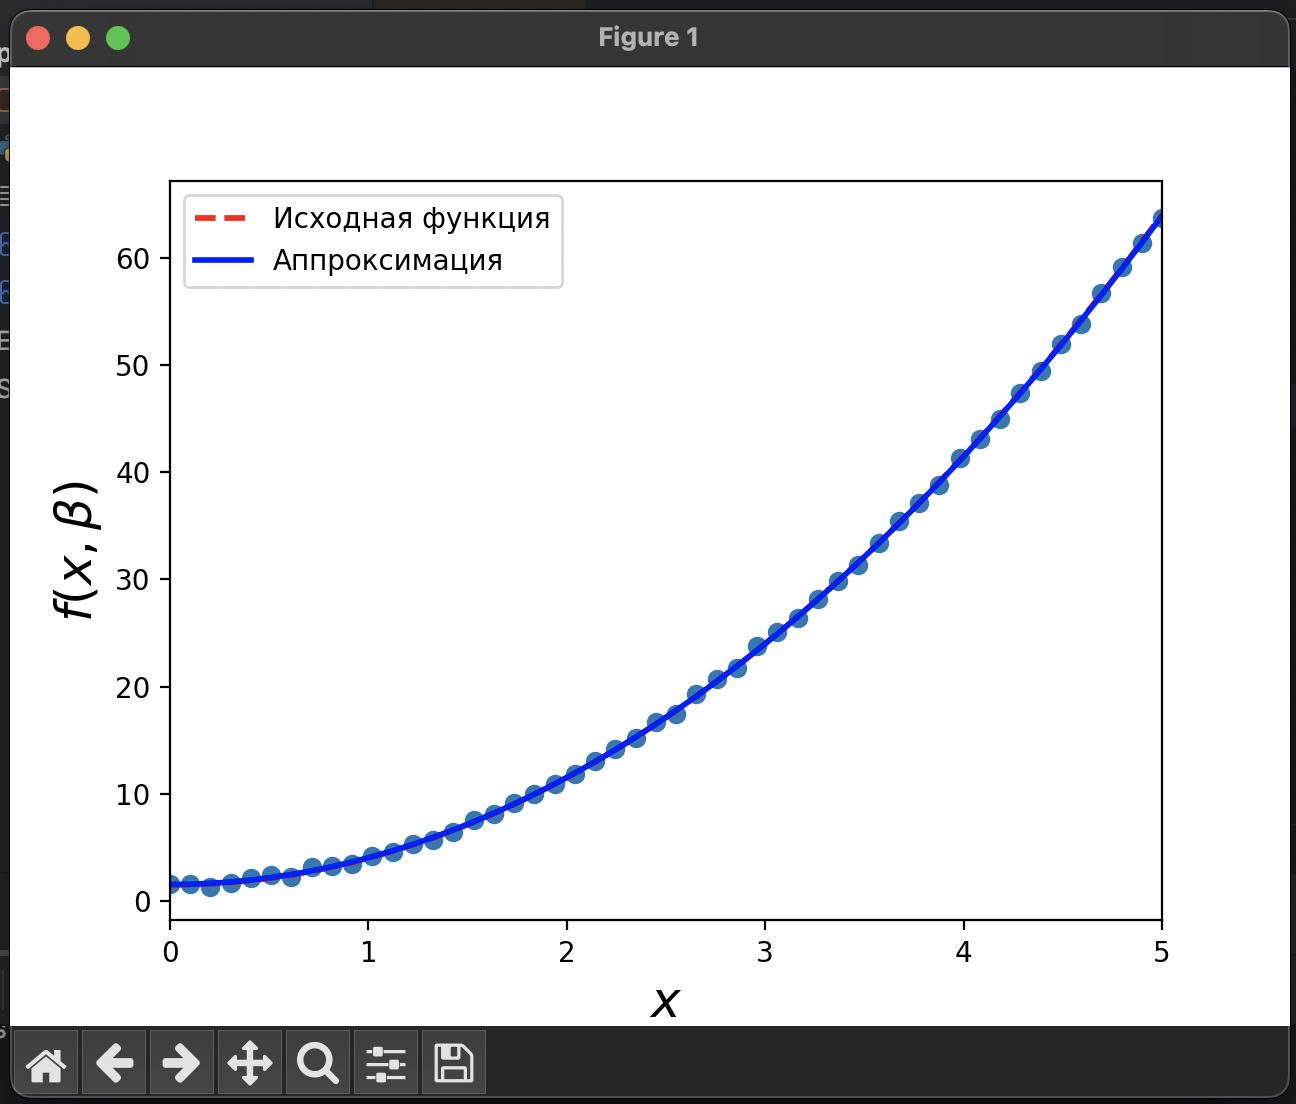

Задание 1.1.5.1: Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥𝑏1
подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

def task_five_fun_one():
    def f(x, b0, b1):
        return b0 + b1 * x ** 2

    xdata = np.linspace(0, 5, 50)
    b0, b1 = 1.5, 2.5
    y = f(xdata, b0, b1)
    ydata = y + 0.2 * np.random.randn(len(xdata))

    beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

    print("оптимальные коэффициенты:", beta_opt)
    lin_dev = sum(beta_cov[0])
    print("линейное отклонение:", lin_dev)
    residuals = ydata - f(xdata, *beta_opt)
    fres = sum(residuals ** 2)
    print("квадратичное отклонение:", fres)

    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata)
    ax.plot(xdata, y, 'r--', lw=2, label='исходная функция')
    ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='аппроксимация')
    ax.set_xlim(0, 5)
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
    ax.legend()
    plt.show()

def main() :
    task_five_fun_one()

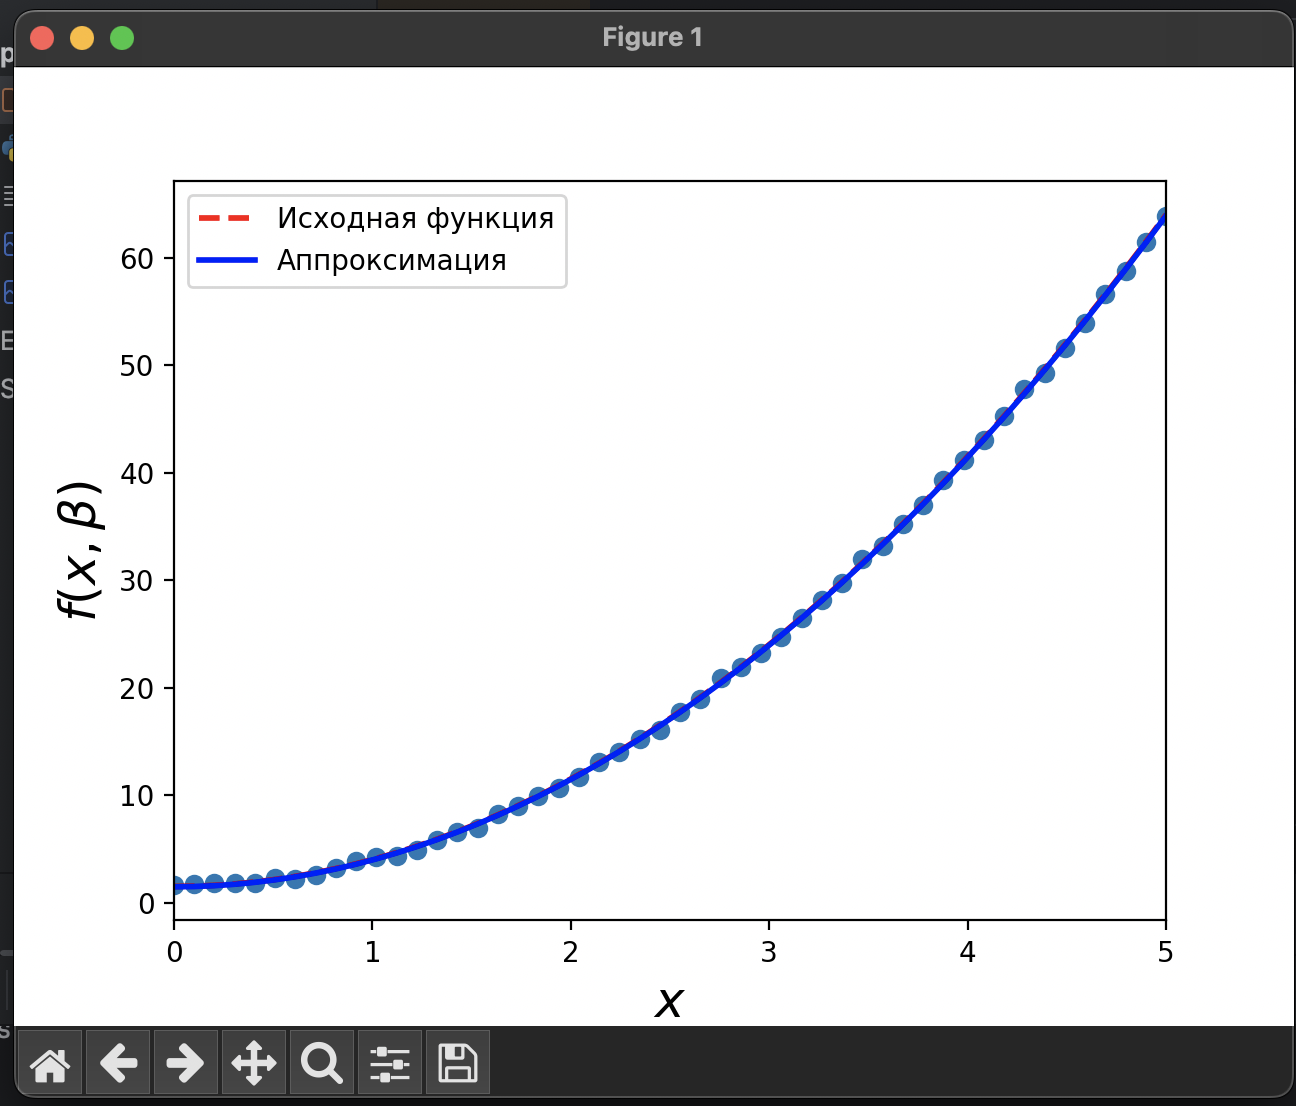

2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

def task_five_fun_two():
    def f(x, b0, b1, b2):
        return b0 + b1 * x + b2 * x ** 2

    xdata = np.linspace(0, 5, 50)
    beta = (0.25, 0.75, 0.5)
    y = f(xdata, *beta)
    ydata = y + 0.05 * np.random.randn(len(xdata))

    beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

    print("Оптимальные коэффициенты:", beta_opt)
    lin_dev = sum(beta_cov[0])
    print("Линейное отклонение:", lin_dev)
    residuals = ydata - f(xdata, *beta_opt)
    fres = sum(residuals ** 2)
    print("Квадратичное отклонение:", fres)

    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata)
    ax.plot(xdata, y, 'r', lw=2, label='Исходная функция')
    ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='Аппроксимация')
    ax.set_xlim(0, 5)
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
    ax.legend()
    plt.show()

def main() :
    task_five_fun_two()

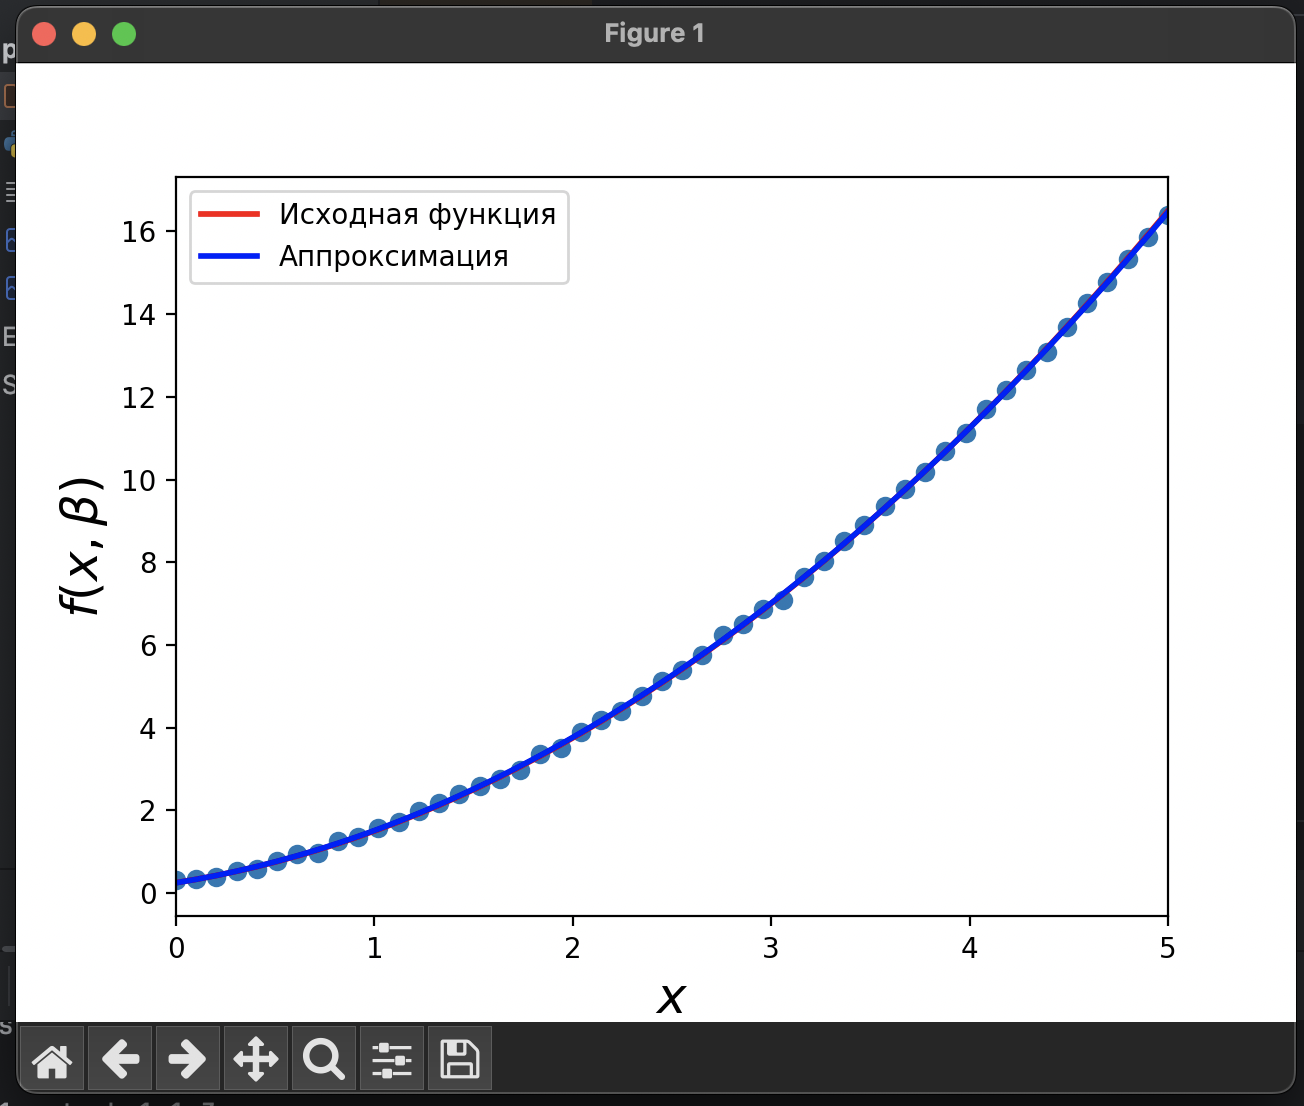

3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import ssl

def task_five_fun_three():
    def f(x, b0, b1):
        return b0 + b1 * np.log(x)

    xdata = np.linspace(1, 5, 50)
    beta = (1, 2)
    y = f(xdata, *beta)
    ydata = y + 0.05 * np.random.randn(len(xdata))

    beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

    print("Оптимальные коэффициенты:", beta_opt)
    lin_dev = sum(beta_cov[0])
    print("Линейное отклонение:", lin_dev)
    residuals = ydata - f(xdata, *beta_opt)
    fres = sum(residuals ** 2)
    print("Квадратичное отклонение:", fres)

    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata)
    ax.plot(xdata, y, 'r', lw=2, label='Исходная функция')
    ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='Аппроксимация')
    ax.set_xlim(0, 5)
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
    ax.legend()
    plt.show()

def main() :
    task_five_fun_three()

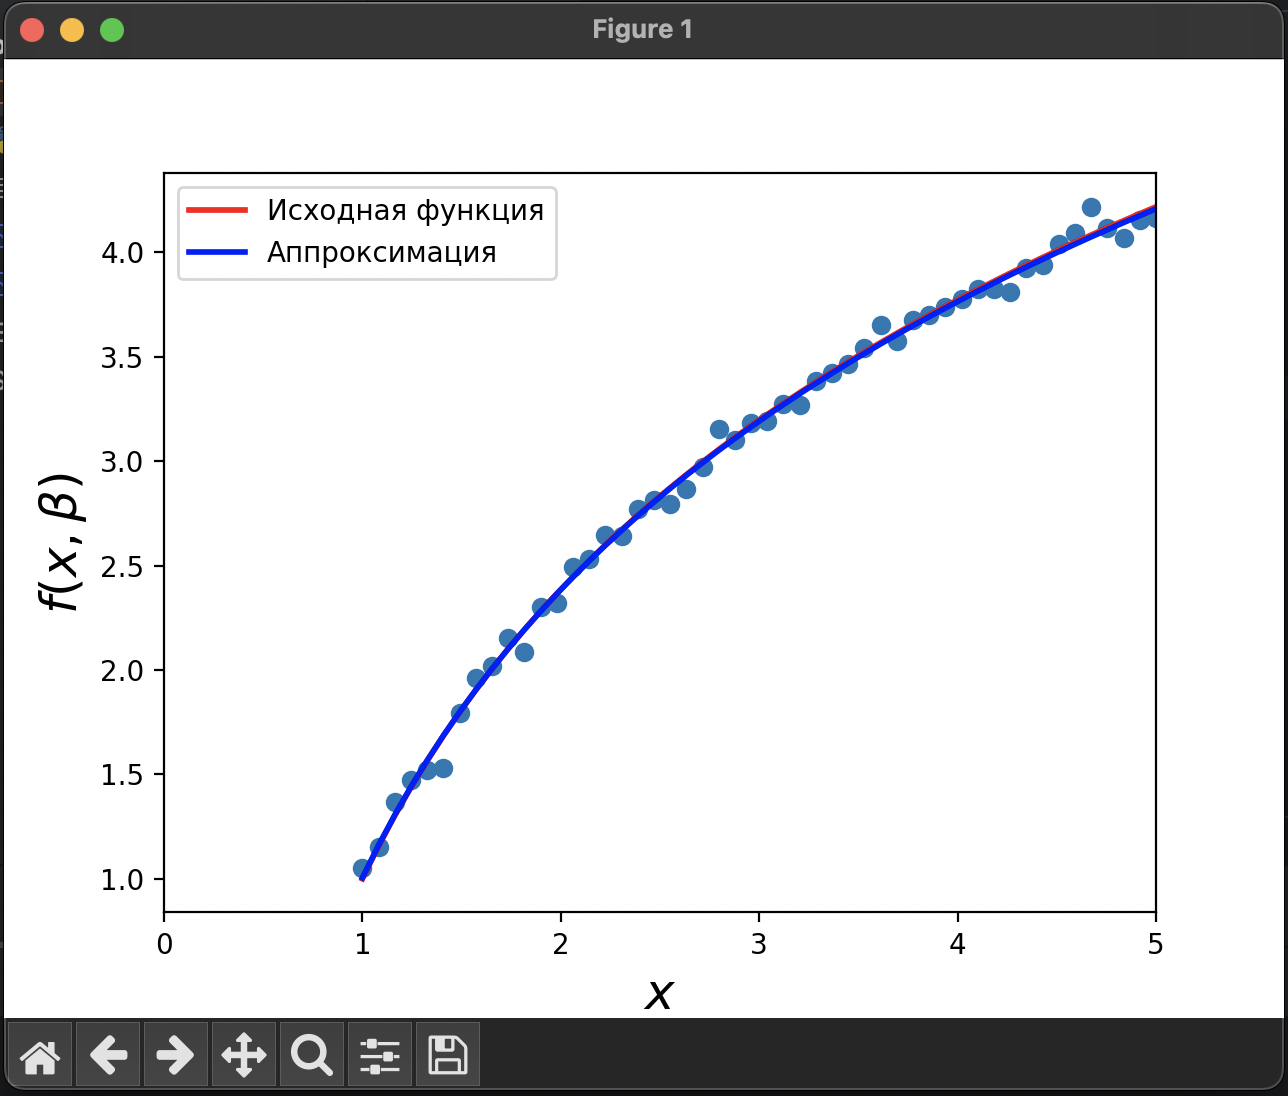

4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥𝑏1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import ssl

def task_five_fun_four():
    def f(x, b0, b1):
        return b0 * x ** b1

    xdata = np.linspace(1, 5, 50)
    beta = (1, 2)
    y = f(xdata, *beta)
    ydata = y + 0.05 * np.random.randn(len(xdata))

    beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

    print("Оптимальные коэффициенты:", beta_opt)
    lin_dev = sum(beta_cov[0])
    print("Линейное отклонение:", lin_dev)
    residuals = ydata - f(xdata, *beta_opt)
    fres = sum(residuals ** 2)
    print("Квадратичное отклонение:", fres)

    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata)
    ax.plot(xdata, y, 'r', lw=2, label='Исходная функция')
    ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='Аппроксимация')
    ax.set_xlim(0, 5)
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
    ax.legend()
    plt.show()

def main() :
    task_five_fun_four()

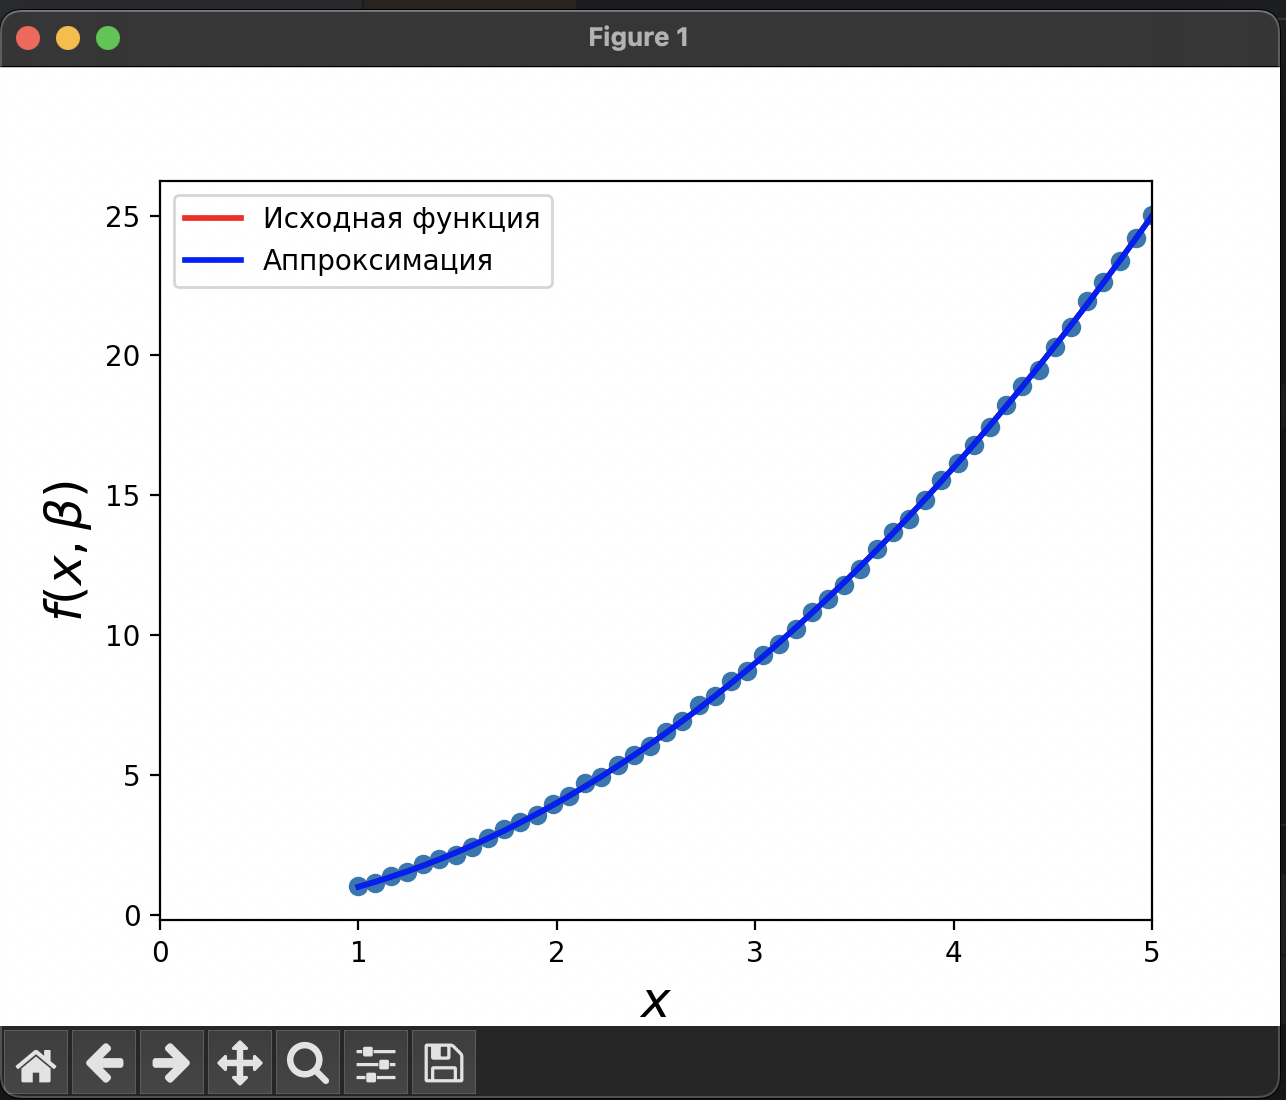

Задание 1.2.1:
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-
regression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import ssl

def task_1_2_1():
    ssl._create_default_https_context = ssl._create_unverified_context

    url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
    data = pd.read_csv(url)

    years_experience = data['YearsExperience'].values.reshape(-1, 1)
    salary = data['Salary'].values

    model = LinearRegression()
    model.fit(years_experience, salary)

    intercept = model.intercept_
    slope = model.coef_[0]
    print("Intercept:", intercept)
    print("Slope:", slope)

    plt.scatter(years_experience, salary, color='blue', label='Data')
    plt.plot(years_experience, model.predict(years_experience), color='red', label='Linear Regression')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.title('Linear Regression: Salary vs. Years of Experience')
    plt.legend()
    plt.show()

    years_exp_new = np.array([[10], [15], [20]])
    predictions = model.predict(years_exp_new)
    for i, exp in enumerate(years_exp_new):
        print(f"Predicted salary for {exp[0]} years of experience: {predictions[i]}")

def main() :
    task_1_2_1()

Задание 1.3.2:
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.

1.https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2.https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-
Quality/master/winequality-red.csv

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import ssl

def task_1_3_2():
    url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
    data = pd.read_csv(url)

    print(data.head())
    print(data.info())

    X = data.drop('quality', axis=1)
    Y = data['quality']

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, Y_train)

    coefficients = pd.DataFrame({'Признак': X.columns, 'Коэффициент': model.coef_})
    print(coefficients)

    Y_pred = model.predict(X_test)

    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
    print(f'Коэффициент детерминации (R^2): {r2:.2f}')

def main() :
    task_1_3_2()

Задача 1.3.3:
Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import ssl

def task_1_3_3():
    x_data = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    y_data = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])

    A1 = np.vstack([x_data, np.ones(len(x_data))]).T
    m1, c1 = np.linalg.lstsq(A1, y_data, rcond=None)[0]

    A2 = np.vstack([x_data ** 2, x_data, np.ones(len(x_data))]).T
    a2, b2, c2 = np.linalg.lstsq(A2, y_data, rcond=None)[0]

    x_values = np.linspace(0, 1, 100)
    y_poly1 = m1 * x_values + c1
    y_poly2 = a2 * x_values ** 2 + b2 * x_values + c2

    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, 'bo', label='Экспериментальные данные')
    plt.plot(x_values, y_poly1, 'r', label=f'Полином 1-й степени: y = {m1:.2f}x + {c1:.2f}')
    plt.plot(x_values, y_poly2, 'g', label=f'Полином 2-й степени: y = {a2:.2f}x^2 + {b2:.2f}x + {c2:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Аппроксимация данных полиномами 1-й и 2-й степени')
    plt.legend()
    plt.grid(True)
    plt.show()

def main() :
    task_1_3_3()

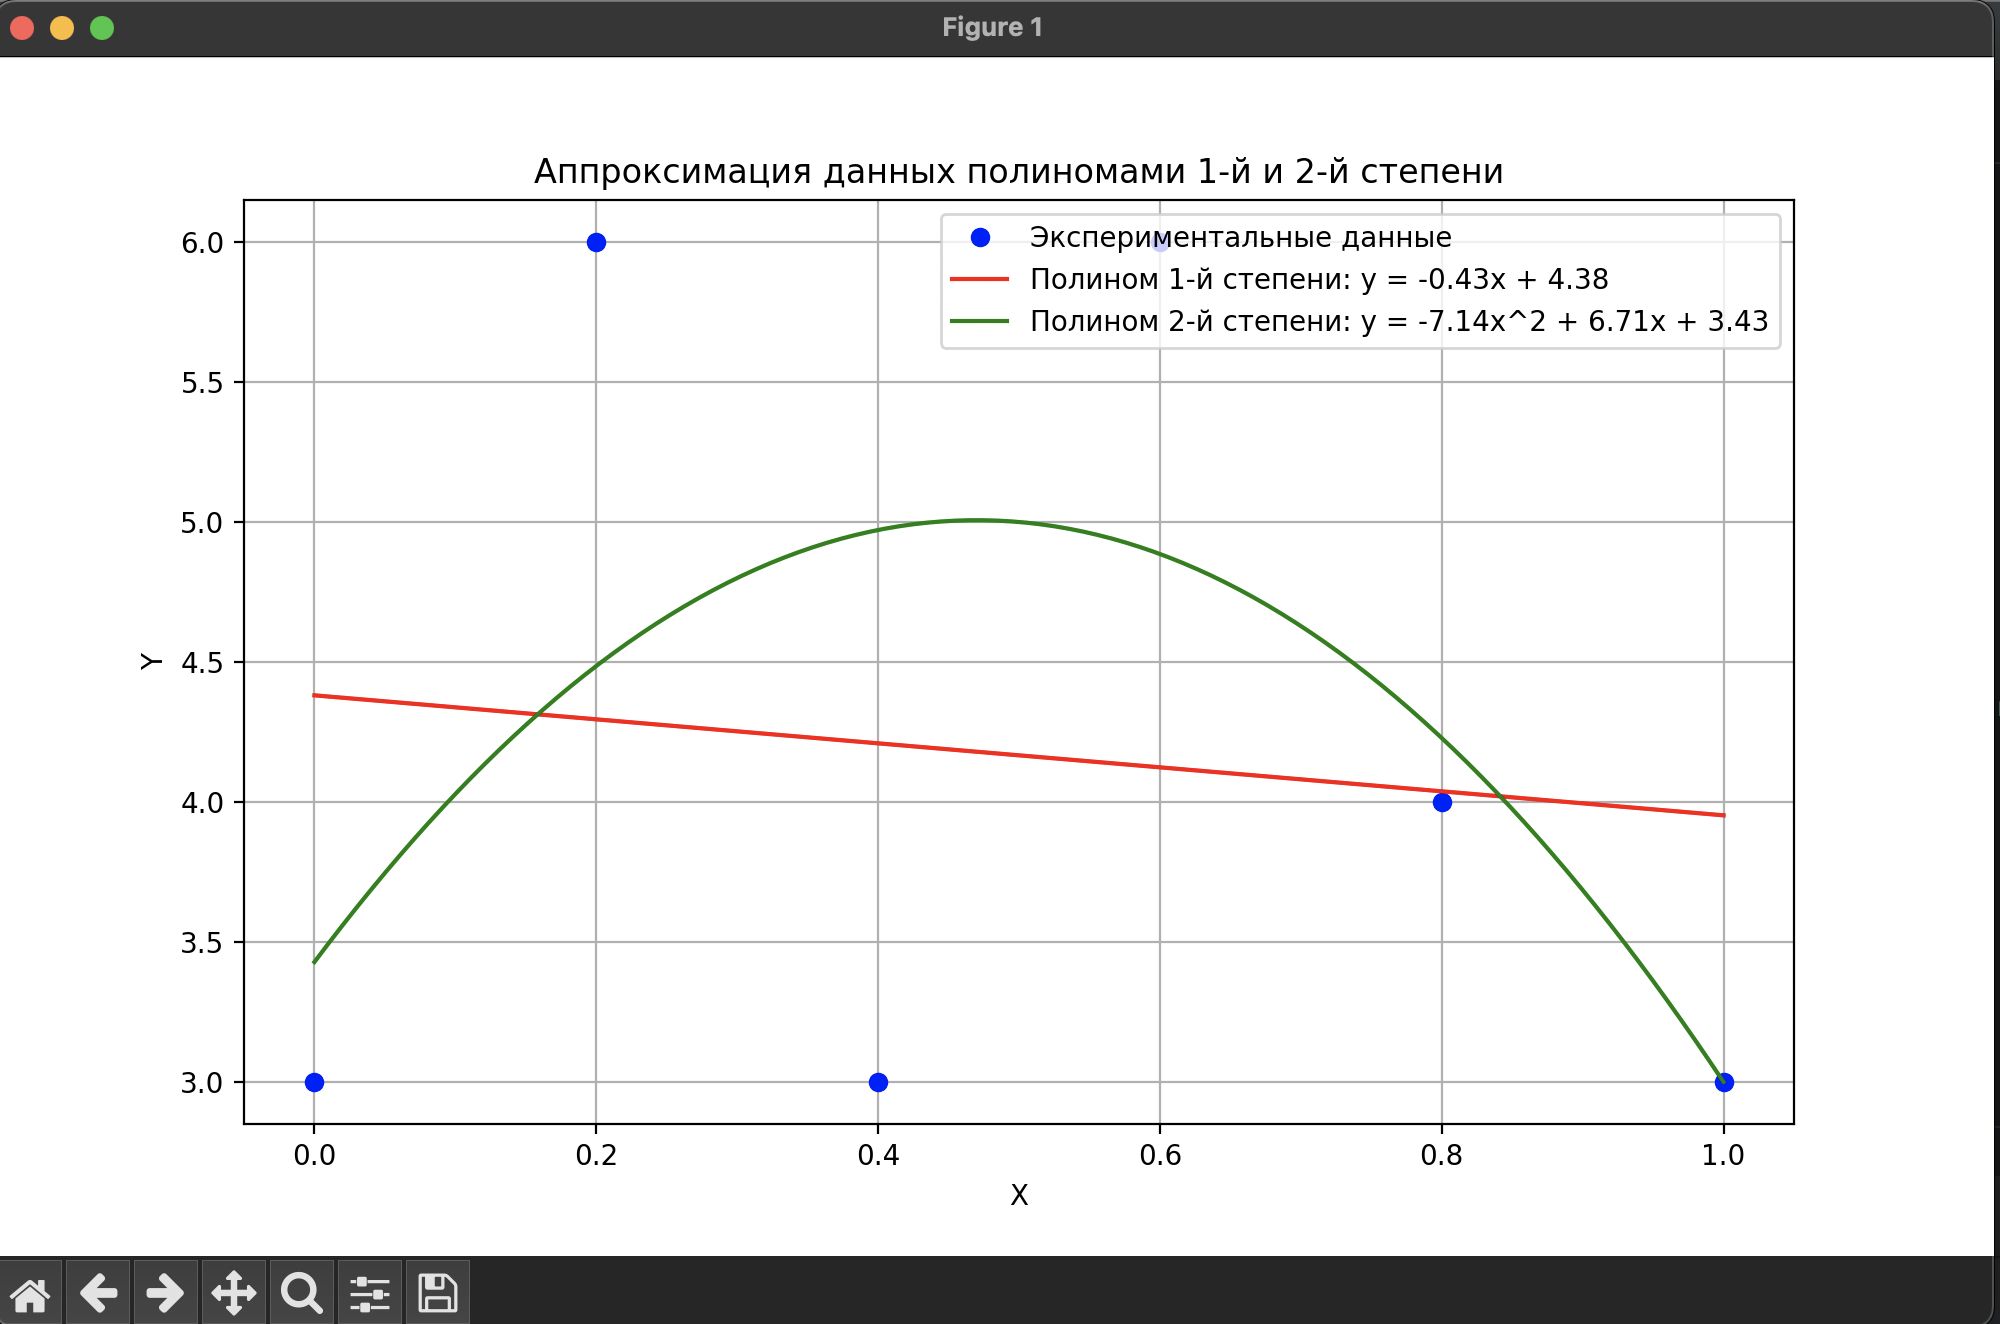

функция main() - вызов в компилятор
функция - Лаунчер

In [ ]:
def main() :
    while True:

        choice = input("\nselect a task to open: \n \n1 = task 1.1.3, \n2 = task 1.1.5.1, \n3 = task 1.1.5.2, \n4 = task 1.1.5.3, \n5 = task 1.1.5.4, \n6 = task 1.2.1, \n7 = task 1.3.2, \n8 = task 1.3.3 \n(no task - if you want to exit, enter 'exit'): ")

        menu = {
            '1': task_1_1_3,
            '2': task_five_fun_one,
            '3': task_five_fun_two,
            '4': task_five_fun_three,
            '5': task_five_fun_four,
            '6': task_1_2_1,
            '7': task_1_3_2,
            '8': task_1_3_3,
            'exit': lambda: print("oh, okay:(")
        }

        if choice in menu:
            menu[choice]()
            if choice == 'exit':
                break
        else:
            print("invalid choice. please enter a valid option")

if __name__ == "__main__":
    main()